<a href="https://colab.research.google.com/github/Neeshi14/Create-CNN-model/blob/main/CNNusingpytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import torch
from torchvision import datasets, transforms

In [21]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])

In [22]:
train_dataset = datasets.MNIST('../data', train=True, download=True,
                              transform=transform)

In [23]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=164, shuffle=True)

In [24]:
test_dataset = datasets.MNIST('../data',train=False, transform=transform)

In [25]:
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=1000,shuffle=False)

In [26]:

for X, Y in train_loader:
    print("TRAIN_LOADER SHAPE")
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {Y.shape} {Y.dtype}")
    break
for X, Y in test_loader:
    print("TEST_LOADER SHAPE")
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {Y.shape} {Y.dtype}")
    break

TRAIN_LOADER SHAPE
Shape of X [N, C, H, W]: torch.Size([164, 1, 28, 28])
Shape of y: torch.Size([164]) torch.int64
TEST_LOADER SHAPE
Shape of X [N, C, H, W]: torch.Size([1000, 1, 28, 28])
Shape of y: torch.Size([1000]) torch.int64


# **Implement the CNN model**

In [31]:
import torch.nn as nn  # for building neural networks
import torch.nn.functional as F # for activation function

In [37]:
class Net(nn.Module):
  def __init__(self):
     super(Net,self).__init__()
     self.conv1=nn.Conv2d(1,32,3,1)#conv2d(input channel,output channel,kernel size,stride)
     self.conv2=nn.Conv2d(32,64,3,1)
     self.dropout1=nn.Dropout2d(0.25)
     self.dropout2=nn.Dropout2d(0.5)
     self.fc1=nn.Linear(9216,128)# fully connected layer,9216->input feature,128->output feature
     self.fc2=nn.Linear(128,10)

  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(x)
    x=self.conv2(x)
    x=F.max_pool2d(x,kernel_size=2)
    x= self.dropout1(x)
    x=torch.flatten(x,1)
    x=self.fc1(x)
    x=F.relu(x)
    x=self.dropout2(x)
    x=self.fc2(x)
    output =F.log_softmax(x,dim=1)
    return output


In [38]:
import torch.optim as optim

model = Net()  # Create an instance of your CNN model
optimizer = optim.Adam(model.parameters(), lr=0.001)   #Parameters()->learnable parameter(likes:Weights and biases, learning rate=0.001)
criterion = nn.NLLLoss()  # Choose a loss function (e.g., Negative Log Likelihood)

In [39]:
epochs = 3  # Number of training epochs

for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()  # Reset gradients
        output = model(data)  # Forward pass
        loss = criterion(output, target)  # Calculate loss
        loss.backward()  # Backpropagate gradients
        optimizer.step()  # Update model parameters

/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


In [40]:
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation during evaluation
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 97.60%


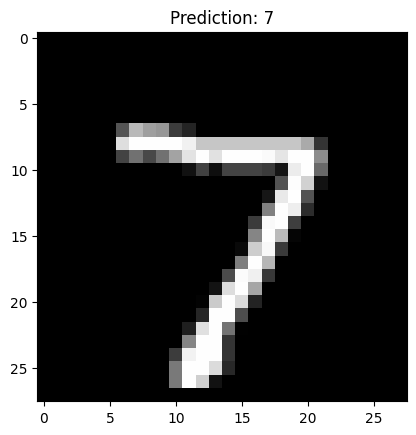

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Get a single image from the test loader
dataiter = iter(test_loader)
images, labels = next(dataiter)
image = images[0]  # Get the first image

# Make a prediction
with torch.no_grad():
    output = model(image.unsqueeze(0))  # Add a batch dimension
    _, predicted = torch.max(output.data, 1)

# Display the image and prediction
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.title(f'Prediction: {predicted.item()}')
plt.show()

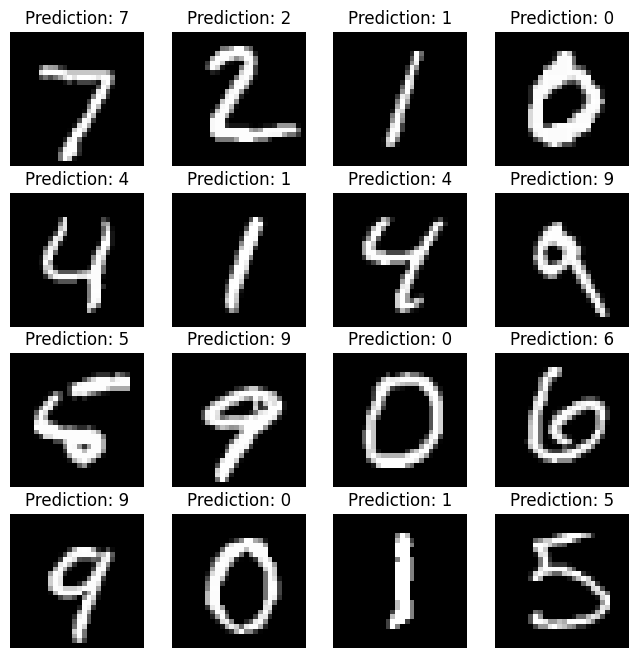

In [42]:
# Get a batch of images from the test loader
images, labels = next(iter(test_loader))

# Make predictions
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

# Display some images and their predictions
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze().numpy(), cmap='gray')
    ax.set_title(f'Prediction: {predicted[i].item()}')
    ax.axis('off')
plt.show()

In [43]:
from sklearn.metrics import confusion_matrix

# Get predictions for the entire test set
all_predictions = []
all_labels = []
with torch.no_grad():
    for data, target in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(target.cpu().numpy())

# Calculate and display the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
print(cm)

# You can also visualize the confusion matrix using libraries like seaborn
# import seaborn as sns
# sns.heatmap(cm, annot=True, fmt='d')
# plt.show()

/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


[[ 970    0    2    1    1    2    0    2    2    0]
 [   0 1125    3    1    1    0    2    2    1    0]
 [   4    4 1010    6    0    0    0    6    1    1]
 [   0    0    3  998    0    4    0    4    1    0]
 [   0    0    2    0  971    0    0    1    1    7]
 [   2    0    0    8    0  875    2    1    0    4]
 [   4    3    2    0    4   12  930    0    3    0]
 [   1    1   14    2    2    0    0 1004    1    3]
 [   3    1    7   12    1    8    5    7  916   14]
 [   2    1    1    4   13    3    1    6    2  976]]
